# Library Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn import set_config; set_config(display='diagram')
from IPython.display import display, HTML
display(HTML("<style>.container { width:88% !important; }</style>"))

In [33]:
from scipy import stats

# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer, mean_squared_log_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Import

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Define X and y

In [4]:
X = df.drop(columns=['Id','SalePrice'])
y = df['SalePrice']

## Categorical feature selection

In [6]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [9]:
feat_categorical_unique = X.select_dtypes('object').nunique()

In [10]:
feat_categorical_unique.sum()

252

<AxesSubplot:ylabel='Frequency'>

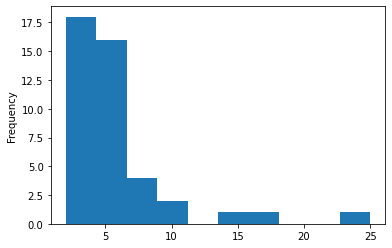

In [11]:
feat_categorical_unique.plot(kind='hist')

In [17]:
feat_categorical_small = feat_categorical_unique[feat_categorical_unique<7].index.tolist()

In [18]:
len(feat_categorical_small)

34

# Preproc Baseline

## Define pipelines

In [24]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=['int64','float64'])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder='drop'
)

preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f68291409a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ign...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'BldgType', 'RoofStyle',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'FireplaceQu', 'GarageType', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive', ...])])

In [25]:
preprocessed = preproc_baseline.fit_transform(X)
shape_preproc_baseline = preprocessed.shape
shape_preproc_baseline

(1460, 183)

In [28]:
pipe_baseline = make_pipeline(preproc_baseline, DecisionTreeRegressor())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f68291409a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencod...
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'RoofStyle',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'FireplaceQu', 'GarageType',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive', ...])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

## Define rmsle scorer

In [34]:
rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5)

rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)

## cross validate

In [35]:
cv_results = cross_validate(pipe_baseline, X, y, cv=5, scoring=rmsle)
cv_results

{'fit_time': array([0.04398584, 0.03185272, 0.03166103, 0.03181696, 0.03086019]),
 'score_time': array([0.00617027, 0.00572109, 0.00561786, 0.00559449, 0.00571632]),
 'test_score': array([0.21404346, 0.23778044, 0.19345806, 0.20006164, 0.23334317])}

In [37]:
score_baseline = cv_results['test_score'].mean()
score_baseline

0.2157373527697001

## baseline prediction

In [38]:
X_test = pd.read_csv('data/test.csv')
X_test_ids = X_test['Id']
X_test = X_test.drop(columns=['Id'])

pipe_baseline.fit(X,y)
y_pred_baseline = pipe_baseline.predict(X_test)
y_pred_baseline

array([129000., 157000., 193000., ..., 139000.,  93500., 205000.])

In [41]:
results = pd.concat([X_test_ids, pd.Series(y_pred_baseline, name='SalePrice')], axis=1)
results.head(3)

,Id,SalePrice
0,1461,129000.0
1,1462,157000.0
2,1463,193000.0


In [42]:
results.to_csv('data/submission_baseline.csv', header=True, index=False)

# Iterations